## Notebook that reproduces Issue #1 

Issue is that UnivariateSpline botches finding roots for some dataset (IN[10])

Problem is that it depends on very small changes to data, so pasting xdata and ydata to another notebook won't work. 

In [1]:
%matplotlib inline

In [2]:
import pathlib
import numpy as np
import pandas

from matplotlib import pylab

from multiprocessing import Pool

from scipy import signal

from kaskady2.analyze.fits import * 
from kaskady2.analyze.profile import *
from kaskady2.analyze.profile_fits import *
from kaskady2.analyze.fluctuation_treshold import *
from kaskady2.loader.reader import CascadeSetLoader
from kaskady2.utils import get_fwhm


In [3]:
cascades = CascadeSetLoader.find_cascades(
  pathlib.Path('/home/jb/kaskady-data/g4-production'), 
  cuts_kev={3000}, material_names={'G4_BGO'}, energies_mev={1125}
    
)
geometry = cascades[0].main_geometry


In [4]:
fluc = FluctuationCalculation.from_geometry(
    geometry, 0.9
)

In [5]:
values, bins = fluc.make_histogram(normed=True)
bincenters = 0.5*(bins[1:]+bins[:-1])

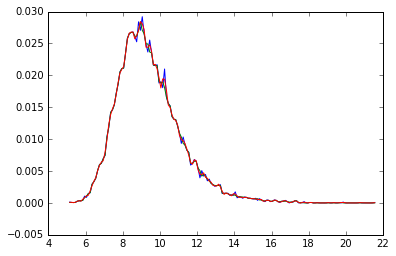

In [6]:
pylab.plot(bincenters, values)
meld = signal.medfilt(values)
pylab.plot(bincenters, meld)
savgol = signal.savgol_filter(values, window_length=7, polyorder=4, mode='constant', cval=0)
pylab.plot(bincenters, savgol)

In [7]:
fit = FitObject(
    FluctuationFitData(fluc), 
    WeibullFunc()
)

In [8]:
fit_fwhm = get_fwhm(
  ydata=WeibullFunc().fit_function(fit.data.xdata, 1, 5, +np.min(fit.data.xdata)),
  xdata=fit.data.xdata
)
fit_fwhm

0.5114477865706348

In [9]:
histo_fwhm = get_fwhm(
    xdata=fit.data.xdata, ydata=signal.medfilt(fit.data.ydata, kernel_size=5)
)
histo_fwhm

0.0

In [10]:

import math

import numpy as np
from scipy import interpolate
xdata=fit.data.xdata
ydata=signal.medfilt(fit.data.ydata, kernel_size=5)
ydata-=np.max(ydata)/2
spline = interpolate.UnivariateSpline(xdata, ydata, s=0)
roots = spline.roots()
math.fabs(np.min(roots) - np.max(roots)), roots

(0.0, array([ 7.31758255]))

In [11]:
pylab.plot(xdata, ydata)

In [ ]:
pylab.plot(xdata, ydata - (np.max(ydata) / 2))
pylab.plot(xdata, spline(xdata))

In [ ]:
histo_fwhm / fit_fwhm

In [ ]:
WeibullFunc().estimate_initial_parameters(fit.data.xdata, fit.data.ydata)

In [ ]:
# pylab.plot(bincenters, values)
pylab.plot(fit.data.xdata, fit.data.ydata)
pylab.plot(fit.data.xdata, fit.function.fit_function(fit.data.xdata, 20, 5, -2.5))

In [ ]:
np.sum(fit.data.ydata)

In [ ]:
params, pcov = fit.do_fit()
params, pcov

In [ ]:
pylab.plot(bincenters, values)
pylab.plot(fit.data.xdata, fit.function.fit_function(fit.data.xdata, *params))
initial_pars = fit.function.estimate_initial_parameters(fit.data.xdata, fit.data.ydata)
pylab.plot(
    fit.data.xdata, 
    fit.function.fit_function(fit.data.xdata, *initial_pars[0])) 
          

In [ ]:
initial_pars

In [ ]:
func = fit.function.estimate_initial_parameters()

In [ ]:
np.arange(0, 10)

In [ ]:
lambda_par, k, b = 0.03,  5.  , -2.5 
x = fit.data.xdata
x = (x + b) 
result = np.where(
  x < 0,
  0,
  (k / lambda_par) * (x / lambda_par) ** (k - 1) * np.exp(-(x / lambda_par)**k)
)
result / result.sum()

In [ ]:
 (k / lambda_par) * (x / lambda_par) ** (k - 1) * np.exp(-(x / lambda_par)**k)

In [ ]:
 (x / lambda_par) ** (k - 1

In [ ]:
np.exp(-(x / lambda_par)

In [ ]:
(x / lambda_par)

In [ ]:
fit.function.fit_function(fit.data.xdata, 1, 5, .05, -30)